# 

EEG测量每个电极和参考电极之间的电压（电势差）。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample

Opening raw data file /Users/reallo/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
320 events found
Event IDs: [ 1  2  3  4  5 32]


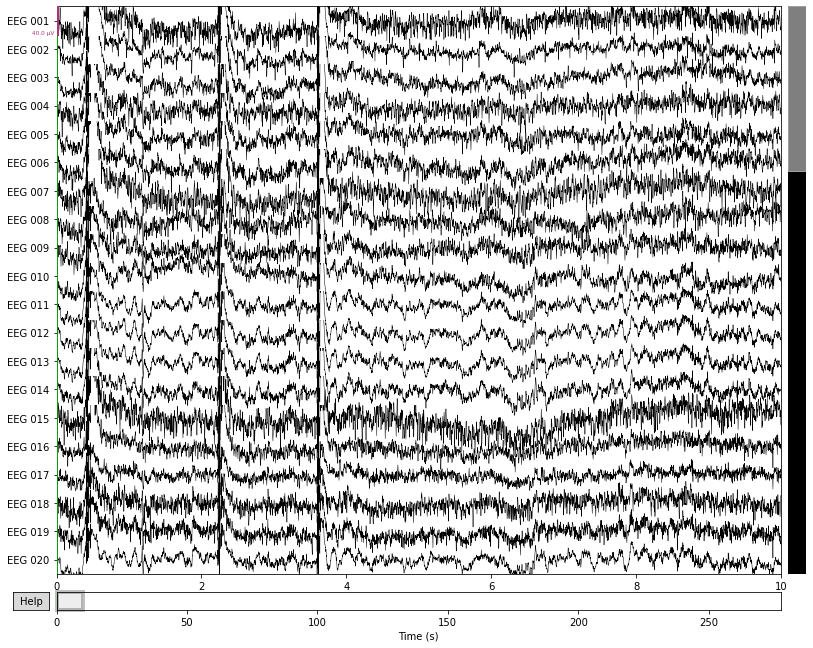

In [2]:
# load dataraw.set_eeg_reference(projection=True).apply_proj()
data_path = sample.data_path()
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')
raw = raw.pick_types(meg=False, eeg=True, eog=True, ecg=True, stim=True,
                     exclude=raw.info['bads']).load_data()
events = mne.find_events(raw)
raw.plot();

In [ ]:
#If projection=True, the average reference is added as a projection and is not applied to the data (it can be applied afterwards with the apply_proj method)
raw.set_eeg_reference(projection=True).apply_proj()

Fitted sphere radius:         91.0 mm
Origin head coordinates:      -4.1 16.0 51.7 mm
Origin device coordinates:    1.4 17.8 -10.3 mm


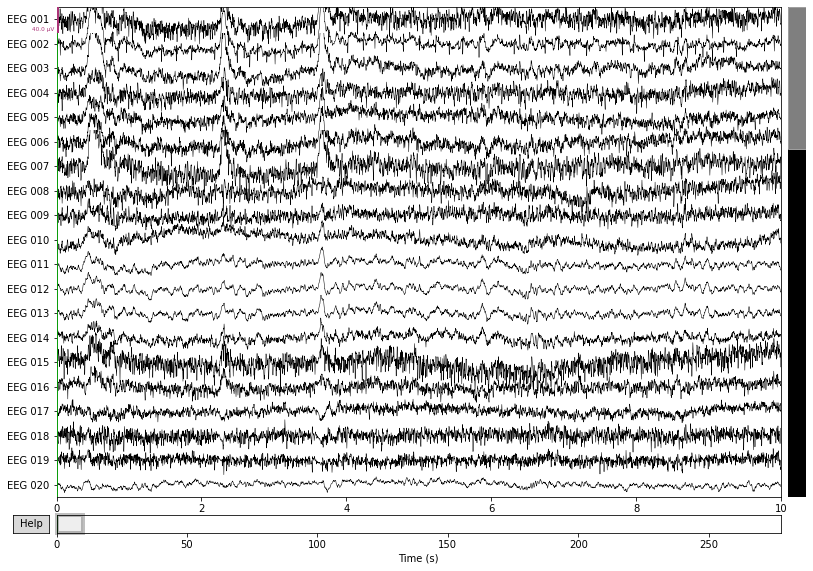

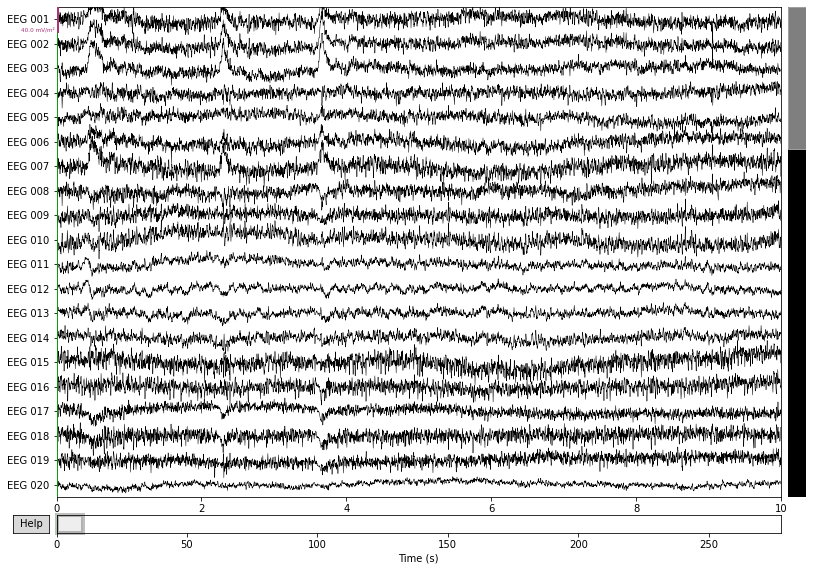

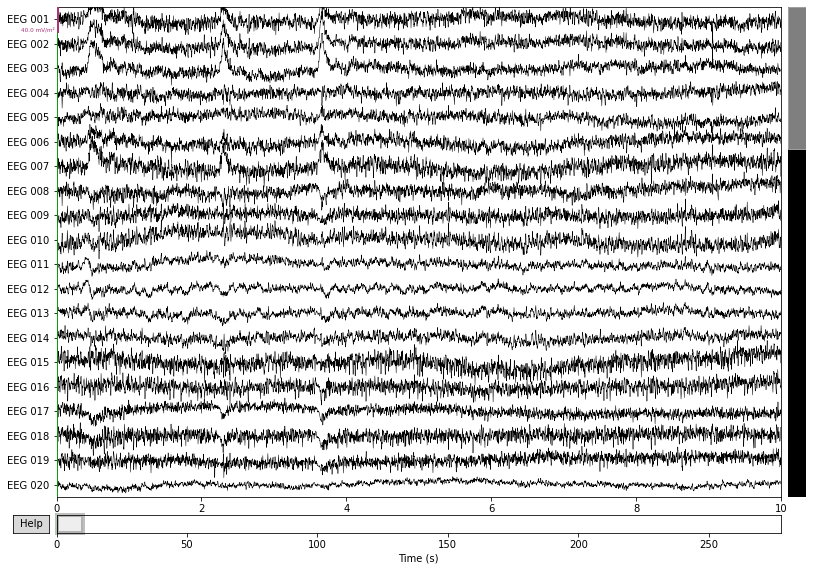

In [5]:
raw_csd = mne.preprocessing.compute_current_source_density(raw)
raw.plot()
raw_csd.plot()

## 经典的脑电数据

In [3]:
eeg_raw = mne.io.read_raw_bdf("/Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf",preload=True)

Extracting EDF parameters from /Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   757.996 secs...


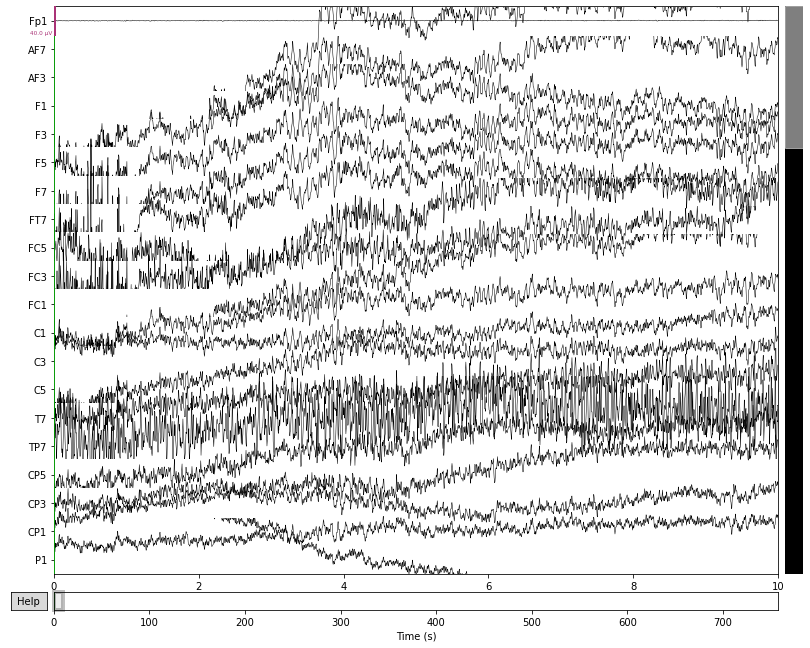

In [4]:
eeg_raw.plot();

In [14]:
# 设置 EEG montage
# set_eeg_reference
# - ref_channels='average'; the name(s) of channel(s); 'avergae';'REST'
eeg_raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawEDF | sub-001_task-P300_run-01_eeg.bdf, 80 x 194048 (758.0 s), ~118.6 MB, data loaded>

### Notes

Some common referencing schemes and the corresponding value for the ref_channels parameter:

**Average reference**:

A new virtual reference electrode is created by averaging the current EEG signal by setting ref_channels='average'. Bad EEG channels are automatically excluded if they are properly set in info['bads'].

---
**A single electrode**:

Set ref_channels to a list containing the name of the channel that will act as the new reference, for example ref_channels=['Cz'].

---
**The mean of multiple electrodes**:

A new virtual reference electrode is created by computing the average of the current EEG signal recorded from two or more selected channels. Set ref_channels to a list of channel names, indicating which channels to use. For example, to apply an average mastoid reference, when using the 10-20 naming scheme, set ref_channels=['M1', 'M2'].

---
**REST**:

The given EEG electrodes are referenced to a point at infinity using the lead fields in forward, which helps standardize the signals.
If a reference is requested that is not the average reference, this function removes any pre-existing average reference projections.
During source localization, the EEG signal should have an average reference.
In order to apply a reference, the data must be preloaded. This is not necessary if ref_channels='average' and projection=True.
For an average or REST reference, bad EEG channels are automatically excluded if they are properly set in info['bads'].

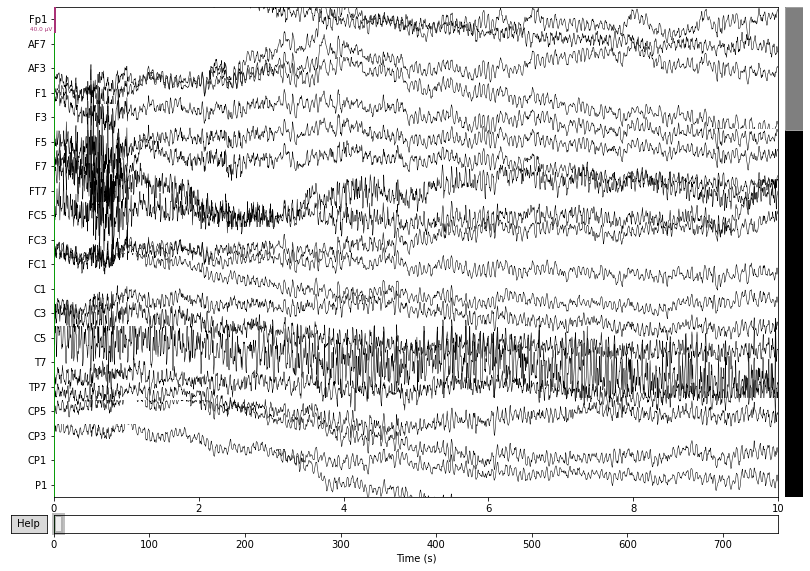

In [17]:
eeg_raw.plot();

In [21]:
raw_custom, _ = mne.set_eeg_reference(eeg_raw,['AF7'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


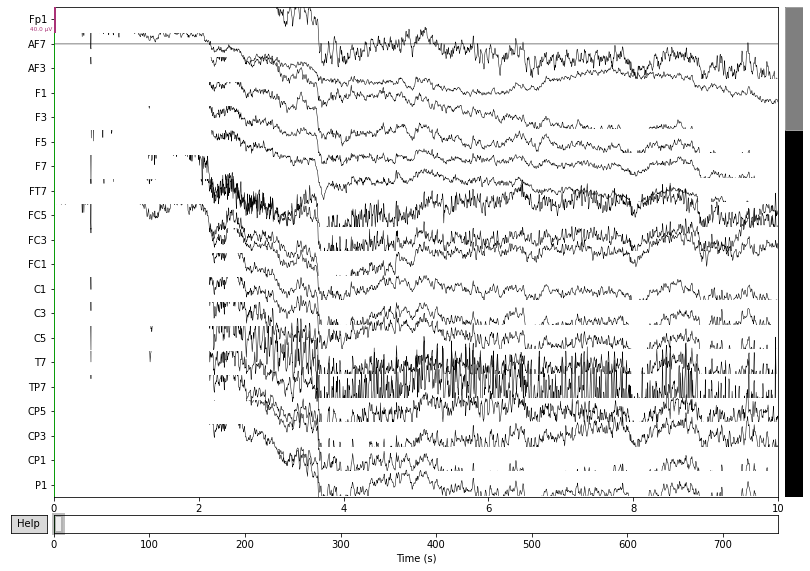

In [22]:
raw_custom.plot();

In [18]:
#Re-reference selected channels using a bipolar referencing scheme.
mne.set_bipolar_reference(eeg_raw,)

TypeError: set_bipolar_reference() missing 2 required positional arguments: 'anode' and 'cathode'

In [23]:
#  Apply an average mastoid reference;
#  when using the 10-20 naming scheme, set ref_channels=['M1', 'M2'].
raw_custom, _ = mne.set_eeg_reference(eeg_raw,['AF7','P1'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


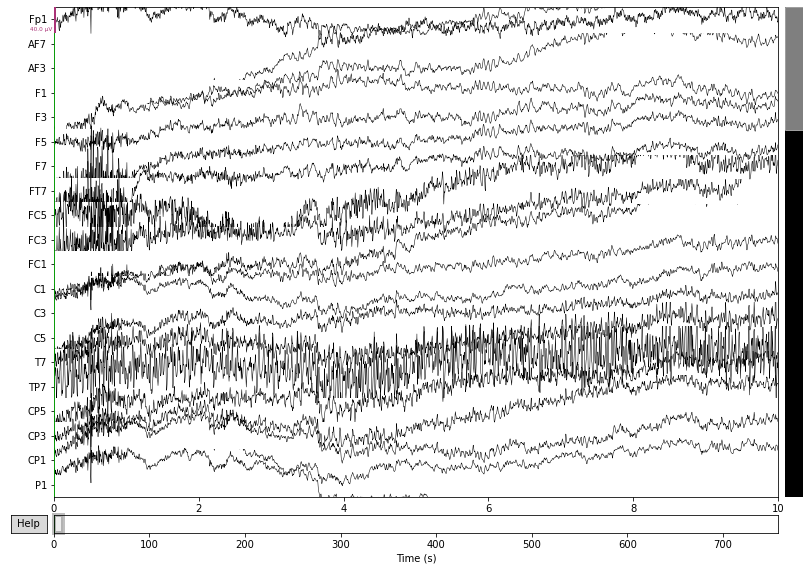

In [24]:
raw_custom.plot();

### 双极导联

注意：Equivalences: T8=T4, P8=T6, T7=T3, P7=T5

#### 双极纵联/Longitudinal 1 L
```
Fp1 : "-F7"
F7 : "-T7"
T7 : "-P7"
P7 : "-O1"
Fp1 : "-F3"
F3 : "-C3"
C3 : "-P3"
P3 : "-O1"```

In [5]:
# load eeg data
eeg_raw = mne.io.read_raw_bdf("/Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf",preload=True)


Extracting EDF parameters from /Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   757.996 secs...


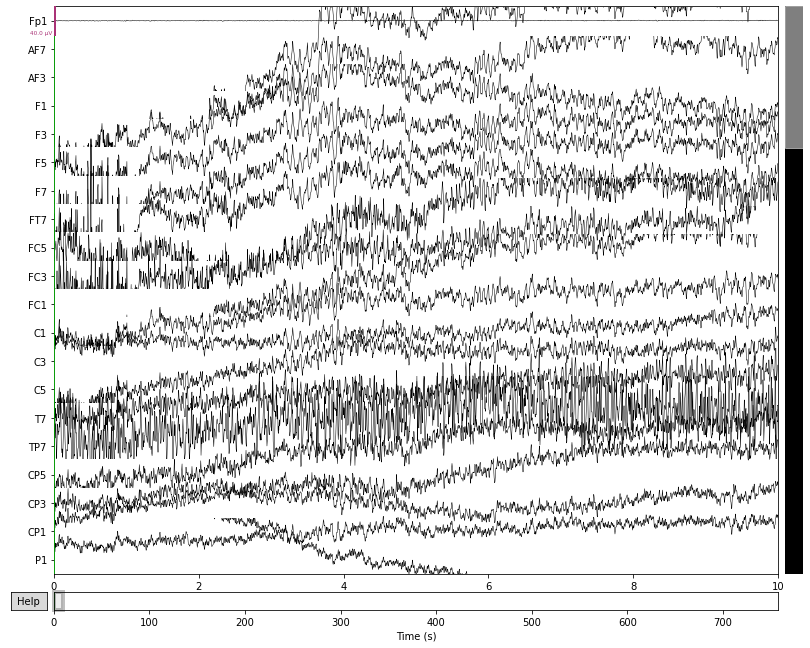

In [6]:
eeg_raw.plot();

In [12]:
eeg_raw.info['ch_names']

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'GSR1',
 'GSR2',
 'Erg1',
 'Erg2',
 'Resp',
 'Plet',
 'Temp',
 'Status']

In [53]:
#Re-reference selected channels using a bipolar referencing scheme.
# computation method:  anode + cathnode； Fp1 + (-F7)
# Equivalences: T8=T4, P8=T6, T7=T3, P7=T5
# # Longitudinal 1 L
# Fp1 : "-F7"
# F7 : "-T7"
# T7 : "-P7"
# P7 : "-O1"
# Fp1 : "-F3"
# F3 : "-C3"
# C3 : "-P3"
# P3 : "-O1"
#
cathnode = ['F7','T7','P7','O1','F3','C3','P3','O1'] #  负
anode= ['Fp1','F7','T7','P7','Fp1','F3','C3','P3'] # 正

bi_raw = mne.set_bipolar_reference(eeg_raw,anode,cathnode,verbose=True)

EEG channel type selected for re-referencing
Bipolar channel added as "Fp1-F7".
EEG channel type selected for re-referencing
Bipolar channel added as "F7-T7".
EEG channel type selected for re-referencing
Bipolar channel added as "T7-P7".
EEG channel type selected for re-referencing
Bipolar channel added as "P7-O1".
EEG channel type selected for re-referencing
Bipolar channel added as "Fp1-F3".
EEG channel type selected for re-referencing
Bipolar channel added as "F3-C3".
EEG channel type selected for re-referencing
Bipolar channel added as "C3-P3".
EEG channel type selected for re-referencing
Bipolar channel added as "P3-O1".


In [37]:
bi_raw.info['ch_names']

['Fp1-F3',
 'AF7',
 'AF3',
 'F1',
 'F3-C3',
 'F5',
 'F7-T7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3-P3',
 'C5',
 'T7-P7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3-O1',
 'P5',
 'P7-O1',
 'P9',
 'PO7',
 'PO3',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'GSR1',
 'GSR2',
 'Erg1',
 'Erg2',
 'Resp',
 'Plet',
 'Temp',
 'Status',
 'Fp1-F7']

In [42]:

pick_chans = ['Fp1-F3', 'Fp1-F7', 'P7-O1']
sel_raw = bi_raw.copy().pick_channels(pick_chans)

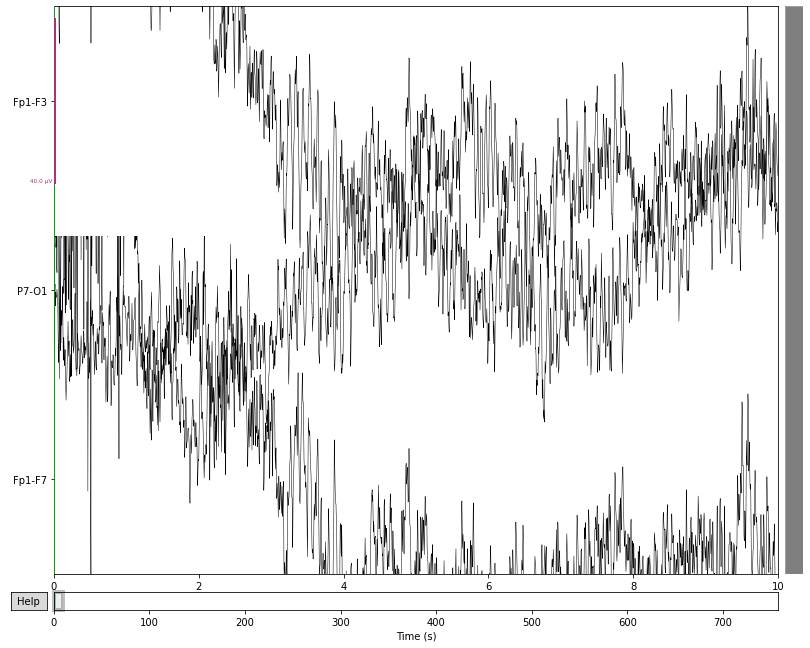

In [43]:
sel_raw.plot();

In [47]:
pick_chans = ['Fp1']
fp1_raw = eeg_raw.copy().pick_channels(pick_chans)
fp1_raw.get_data()

array([[-0.25936688, -0.25936791, -0.25936882, ..., -0.25935276,
        -0.25935279, -0.25935269]])

In [48]:
pick_chans = ['F3']
f3_raw = eeg_raw.copy().pick_channels(pick_chans)
f3_raw.get_data()

array([[0.00567213, 0.00568907, 0.0056801 , ..., 0.00602322, 0.0060235 ,
        0.00602444]])

In [49]:
fp1_raw.get_data() - f3_raw.get_data()

array([[-0.26503901, -0.26505698, -0.26504892, ..., -0.26537598,
        -0.26537629, -0.26537713]])

In [51]:
pick_chans = ['Fp1-F3']
sel_raw = bi_raw.copy().pick_channels(pick_chans)
sel_raw.get_data()

array([[-0.26503901, -0.26505698, -0.26504892, ..., -0.26537598,
        -0.26537629, -0.26537713]])

In [61]:
pick_chans = ['C3']
c3_raw = eeg_raw.copy().pick_channels(pick_chans)
print(c3_raw.get_data())
pick_chans = ['P3']
p3_raw = eeg_raw.copy().pick_channels(pick_chans)
print(p3_raw.get_data())
c3_raw.get_data() - p3_raw.get_data()

[[-0.00170989 -0.00170948 -0.00172032 ... -0.00105442 -0.00105448
  -0.00105354]]
[[0.00563854 0.00564247 0.00563835 ... 0.00618069 0.00617894 0.00617732]]


array([[-0.00734842, -0.00735196, -0.00735867, ..., -0.00723511,
        -0.00723342, -0.00723086]])

In [62]:
pick_chans = ['C3-P3']
sel_raw = bi_raw.copy().pick_channels(pick_chans)
sel_raw.get_data()

array([[-0.00734842, -0.00735196, -0.00735867, ..., -0.00723511,
        -0.00723342, -0.00723086]])

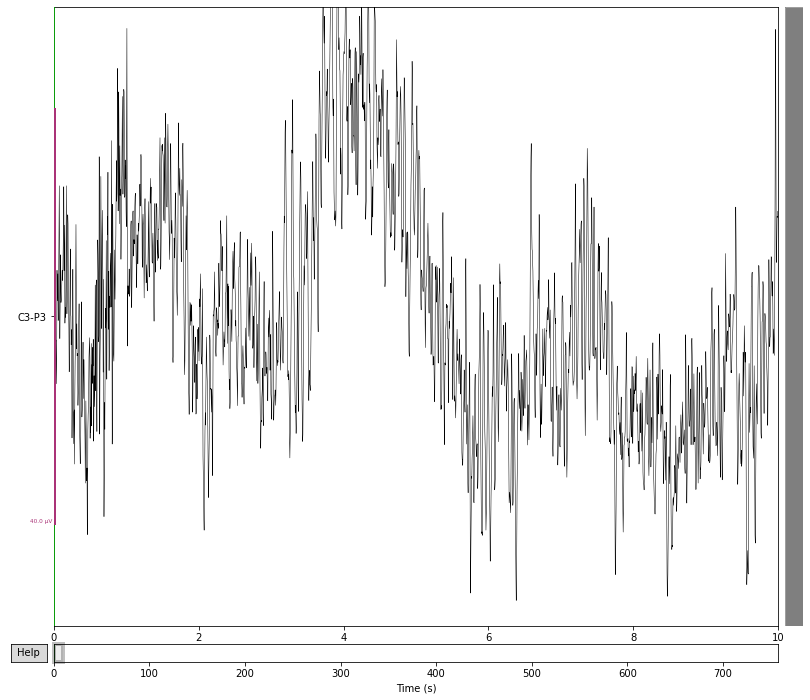

In [63]:
sel_raw.plot();

In [64]:
sel_raw.info['chs'][0]

[{'cal': 1.0,
  'logno': 13,
  'scanno': 13,
  'range': 1.0,
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'C3-P3',
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'coil_type': 5 (FIFFV_COIL_EEG_BIPOLAR),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}]

In [65]:
eeg_raw.info['chs'][0]

{'cal': 1.0,
 'logno': 1,
 'scanno': 1,
 'range': 1.0,
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'Fp1',
 'unit': 107 (FIFF_UNIT_V),
 'coord_frame': 4 (FIFFV_COORD_HEAD),
 'coil_type': 1 (FIFFV_COIL_EEG),
 'kind': 2 (FIFFV_EEG_CH),
 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

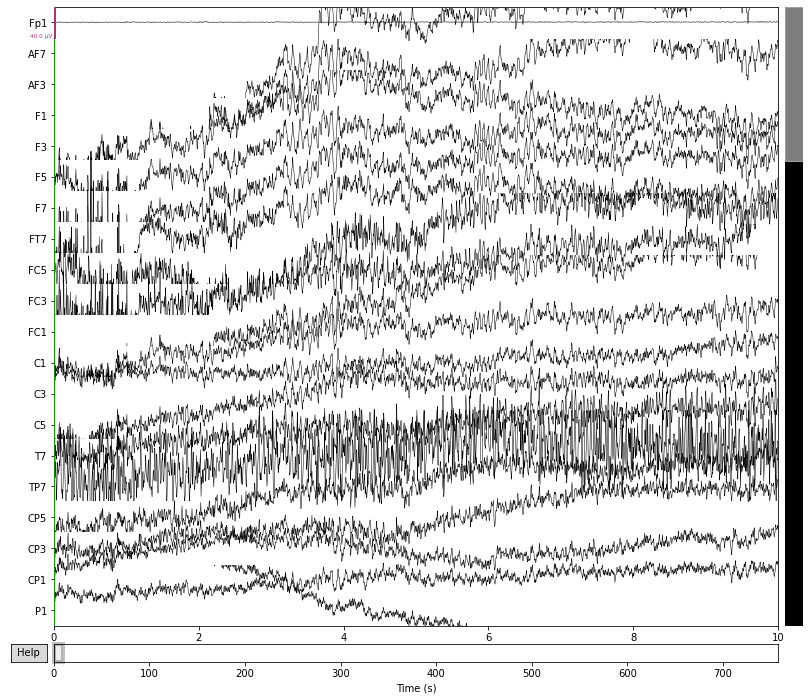

In [66]:
eeg_raw.plot();

## Ref
- https://mne.tools/stable/auto_tutorials/preprocessing/plot_55_setting_eeg_reference.html
- https://mne.tools/dev/auto_tutorials/evoked/plot_eeg_erp.html
- https://mne.tools/0.19/auto_examples/preprocessing/plot_rereference_eeg.html